In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import ml_help
sns.set_theme()

In [3]:
df = pd.read_csv("./data/gardiner_flow.csv.zip")
df

,collectedAt,month,day,day_of_week,hour,minute,currentSpeed
0,2022-07-14 12:45:00+00:00,July,14,Thursday,12,45,94
1,2022-07-14 12:51:44+00:00,July,14,Thursday,12,51,94
2,2022-07-14 12:55:27+00:00,July,14,Thursday,12,55,75
3,2022-07-14 13:00:00+00:00,July,14,Thursday,13,0,72
4,2022-07-14 13:05:00+00:00,July,14,Thursday,13,5,94
...,...,...,...,...,...,...,...
73530,2023-03-26 21:35:00+00:00,March,26,Sunday,21,35,92
73531,2023-03-26 21:40:00+00:00,March,26,Sunday,21,40,92
73532,2023-03-26 21:45:00+00:00,March,26,Sunday,21,45,79
73533,2023-03-26 21:50:00+00:00,March,26,Sunday,21,50,92


In [4]:
df["collectedAt"] = pd.to_datetime(df["collectedAt"],utc=True)

In [5]:
df.drop(["month", "day", "day_of_week", "hour", "minute"], inplace=True, axis=1)
df

,collectedAt,currentSpeed
0,2022-07-14 12:45:00+00:00,94
1,2022-07-14 12:51:44+00:00,94
2,2022-07-14 12:55:27+00:00,75
3,2022-07-14 13:00:00+00:00,72
4,2022-07-14 13:05:00+00:00,94
...,...,...
73530,2023-03-26 21:35:00+00:00,92
73531,2023-03-26 21:40:00+00:00,92
73532,2023-03-26 21:45:00+00:00,79
73533,2023-03-26 21:50:00+00:00,92


In [6]:
df["collectedAt"] = df["collectedAt"].dt.floor("min")
df

,collectedAt,currentSpeed
0,2022-07-14 12:45:00+00:00,94
1,2022-07-14 12:51:00+00:00,94
2,2022-07-14 12:55:00+00:00,75
3,2022-07-14 13:00:00+00:00,72
4,2022-07-14 13:05:00+00:00,94
...,...,...
73530,2023-03-26 21:35:00+00:00,92
73531,2023-03-26 21:40:00+00:00,92
73532,2023-03-26 21:45:00+00:00,79
73533,2023-03-26 21:50:00+00:00,92


# Expand datetime into more granular, numerical features

In [7]:
df["month"] = df["collectedAt"].dt.month
df["day"] = df["collectedAt"].dt.day
df["day_of_week"] = df["collectedAt"].dt.weekday
df["hour"] = df["collectedAt"].dt.hour
df["minute"] = df["collectedAt"].dt.minute
df

,collectedAt,currentSpeed,month,day,day_of_week,hour,minute
0,2022-07-14 12:45:00+00:00,94,7,14,3,12,45
1,2022-07-14 12:51:00+00:00,94,7,14,3,12,51
2,2022-07-14 12:55:00+00:00,75,7,14,3,12,55
3,2022-07-14 13:00:00+00:00,72,7,14,3,13,0
4,2022-07-14 13:05:00+00:00,94,7,14,3,13,5
...,...,...,...,...,...,...,...
73530,2023-03-26 21:35:00+00:00,92,3,26,6,21,35
73531,2023-03-26 21:40:00+00:00,92,3,26,6,21,40
73532,2023-03-26 21:45:00+00:00,79,3,26,6,21,45
73533,2023-03-26 21:50:00+00:00,92,3,26,6,21,50


# Remove unused columns
- Will not remove collectedAt definitely because it will be used to join with future datasets
- Remove column coordinates because it has no purpose other than for plotting
    - To see distance, go to analysis/000_gardiner_flow/065_distance_travelled

In [8]:
df.drop("collectedAt",inplace=True,axis=1)
df

,currentSpeed,month,day,day_of_week,hour,minute
0,94,7,14,3,12,45
1,94,7,14,3,12,51
2,75,7,14,3,12,55
3,72,7,14,3,13,0
4,94,7,14,3,13,5
...,...,...,...,...,...,...
73530,92,3,26,6,21,35
73531,92,3,26,6,21,40
73532,79,3,26,6,21,45
73533,92,3,26,6,21,50


In [11]:
from sklearn.preprocessing import PowerTransformer


df["currentSpeedPowerTransformed"] = PowerTransformer().fit_transform(df["currentSpeed"].to_numpy().reshape(-1, 1))
df

,currentSpeed,month,day,day_of_week,hour,minute,currentSpeedPowerTransformed
0,94,7,14,3,12,45,0.825717
1,94,7,14,3,12,51,0.825717
2,75,7,14,3,12,55,-1.472247
3,72,7,14,3,13,0,-1.586336
4,94,7,14,3,13,5,0.825717
...,...,...,...,...,...,...,...
73530,92,3,26,6,21,35,0.372769
73531,92,3,26,6,21,40,0.372769
73532,79,3,26,6,21,45,-1.255304
73533,92,3,26,6,21,50,0.372769


<Axes: xlabel='currentSpeed', ylabel='Count'>

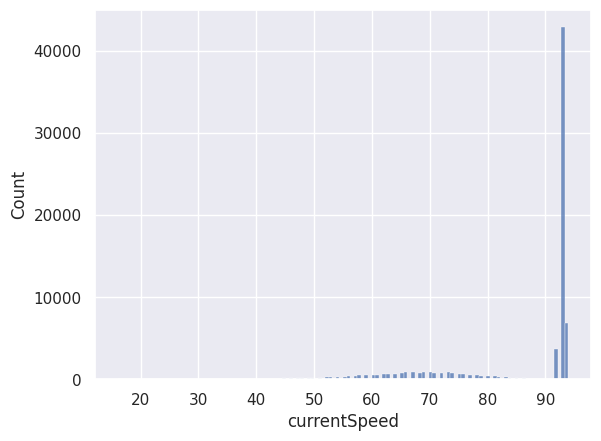

In [12]:
sns.histplot(data=df, x="currentSpeed")

<Axes: xlabel='currentSpeedPowerTransformed', ylabel='Count'>

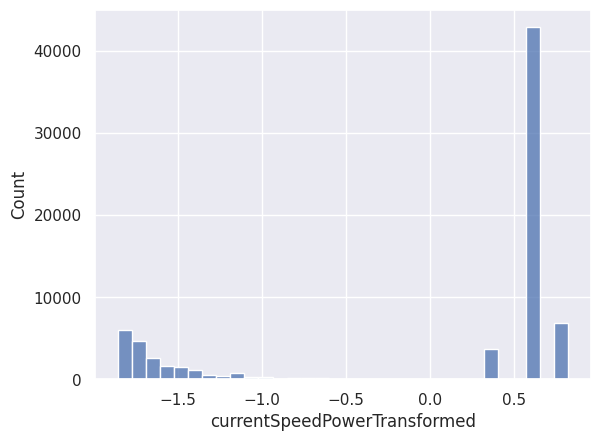

In [13]:
sns.histplot(data=df, x="currentSpeedPowerTransformed")

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(["currentSpeed", "currentSpeedPowerTransformed"],axis=1)
y = df["currentSpeedPowerTransformed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


categorical_feats = ["month","day_of_week"]

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_feats),
        ],
        remainder=StandardScaler(),
        verbose_feature_names_out=True,
    ),
    RandomForestRegressor(),
).set_output(transform="pandas")

model 
r2 0.894230816926371
mae 0.12195324603852917
mse 0.10412738317573593
rmse 0.3226877487227179
mape 0.14949988687012025


[Text(0.5, 0, 'Actual Speed (km/h)'), Text(0, 0.5, 'Predicted Speed (km/h)')]

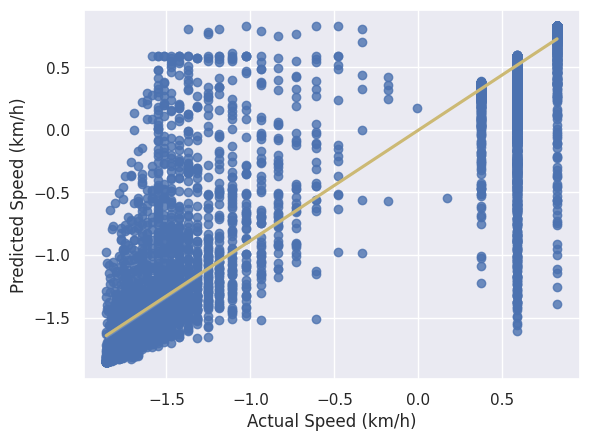

In [21]:
plot_label = "Speed (km/h)"

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
model_metrics = ml_help.get_metrics_reg("",y_test,y_pred)
for key in model_metrics.keys():
    print(key,model_metrics[key])
ax = sns.regplot(x=y_test,y=y_pred,line_kws={"color": "y"})
ax.set(xlabel=f"Actual {plot_label}",ylabel=f"Predicted {plot_label}")

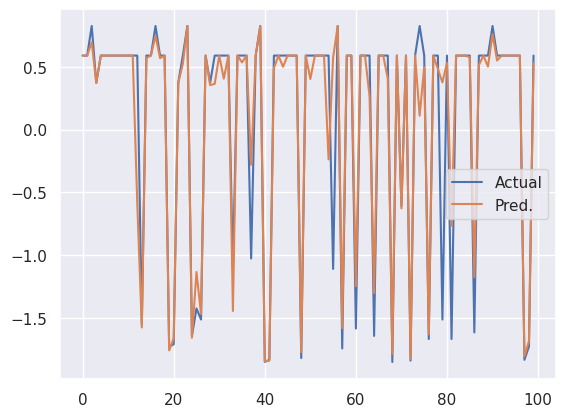

In [22]:
preds = pd.DataFrame({"Actual":y_test,"Pred.":y_pred})
sample = preds.sample(100).reset_index()[["Actual","Pred."]]

ax = sample.plot()